In [1]:
import torch as tr
import numpy as np

import itertools

from PM_models import *
from PM_tasks import *
from help_amtask import *

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
wmsize=5
emsetting=1
seed=3
instdim=10
stimdim=10

net = NetBarCode(wmsize=wmsize,
                 emsetting=emsetting,
                 seed=seed,
                 instdim=instdim,
                 stimdim=stimdim,
                 debug=False)

nmaps = 4
task = TaskArbitraryMaps(nmaps,switchmaps=True,ntokens_surplus=0,seed=0,stimdim=10)

In [3]:
trscL = []
nblocks = 2
emkL = ['conj','conj']
nepsL = [2000,10000]
ntrL = [1,2]
for idx in range(nblocks):
  net.emk=emkL[idx]
  trsc = run_net(net,task,nepsL[idx],3,2,training=True)
  trscL.append(trsc[:,:,nmaps:])
trsc = np.concatenate(trscL)

0.0 0.0
0.2 0.6666666666666666
0.4 0.7222222222222222
0.6 0.7222222222222222
0.8 0.8333333333333334
0.0 0.7222222222222222
0.2 0.7222222222222222
0.4 0.8888888888888888
0.6 0.6666666666666666
0.8 0.7777777777777778


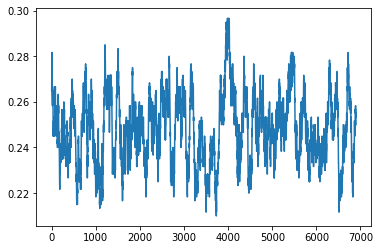

In [4]:
tracc = mov_avg(trsc.mean((1,2)),100)

plt.plot(tracc)

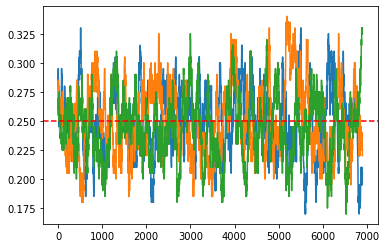

In [5]:
tracc = trsc.mean(-1)

for idx,a in enumerate(tracc.T):
  plt.plot(mov_avg(a,100))
plt.axhline(0.25,c='r',ls='--')

In [6]:
net.debug=True
i,x,y = task.gen_ep_data(4,1)
yh = net(i,x)



st tensor(0.5488)
wm tensor(0.9888)
em tensor(0.)

st tensor(0.7917)
wm tensor(0.0006)
em tensor(0.)

st tensor(0.3595)
wm tensor(0.0427)
em tensor(0.)

st tensor(0.9786)
wm tensor(0.9995)
em tensor(0.)

qkdist2 [0.15  0.035 0.113 0.081]

st tensor(0.5488)
wm tensor(0.9435)
em tensor(0.0006)

st tensor(0.5488)
wm tensor(0.9983)
em tensor(0.)

st tensor(0.3595)
wm tensor(0.0227)
em tensor(0.)

st tensor(0.9786)
wm tensor(0.0012)
em tensor(0.)

st tensor(0.2646)
wm tensor(0.9997)
em tensor(0.)

qkdist2 [0.162 0.038 0.122 0.082 0.118 0.124 0.034 0.087]

st tensor(0.9786)
wm tensor(0.9422)
em tensor(0.0012)

st tensor(0.2646)
wm tensor(0.0016)
em tensor(0.)

st tensor(0.5488)
wm tensor(0.0395)
em tensor(0.)

st tensor(0.9786)
wm tensor(0.9997)
em tensor(0.)

st tensor(0.3595)
wm tensor(0.9973)
em tensor(0.)

qkdist2 [0.151 0.034 0.113 0.08  0.108 0.114 0.033 0.081 0.033 0.099 0.08  0.105]

st tensor(0.5488)
wm tensor(0.9292)
em tensor(0.0012)

st tensor(0.7917)
wm tensor(0.9998)
em tensor

0.0 0.75
0.2 0.7333333333333333
0.4 0.7666666666666667
0.6 0.7333333333333333
0.8 0.7333333333333333
0.0 0.8
0.2 0.7333333333333333
0.4 0.8
0.6 0.7333333333333333
0.8 0.8166666666666667


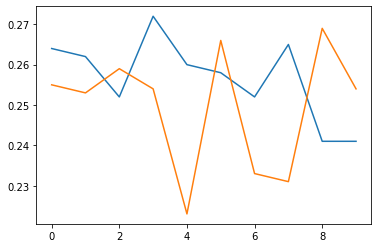

In [7]:
net.debug=False
for em in [1,0]:
  net.EMsetting=em
  evsc = run_net(net,task,500,10,2,training=False)
  evacc = evsc[:,:,nmaps:]
  plt.plot(evacc.mean((0,2)))